In [32]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
anns = pd.read_csv("./SmanDescGO.tsv", sep="\t")

In [4]:
#Unchar stores the proteins described as uncharacterized proteins
Unchar = anns[anns["Protein names"]=="Uncharacterized protein"]

In [10]:
df = pd.read_csv("./SmanGO.tsv", sep="\t")

In [11]:
RBHdf = pd.read_csv("./SmCelAli.tsv", sep="\t", header=None)

(0.0, 1.0)

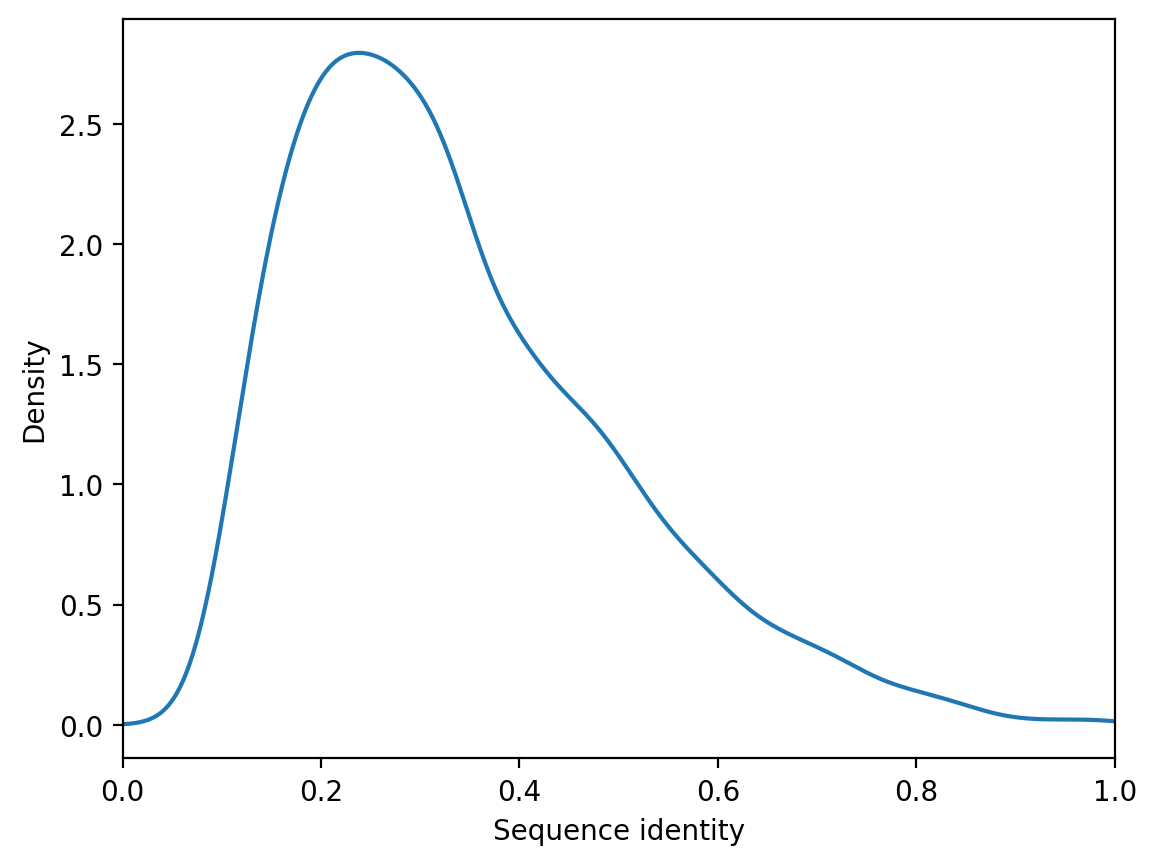

In [40]:
%config InlineBackend.figure_format = 'retina'

RBHdf[2].plot.kde()
plt.xlabel("Sequence identity")
plt.xlim([0,1])

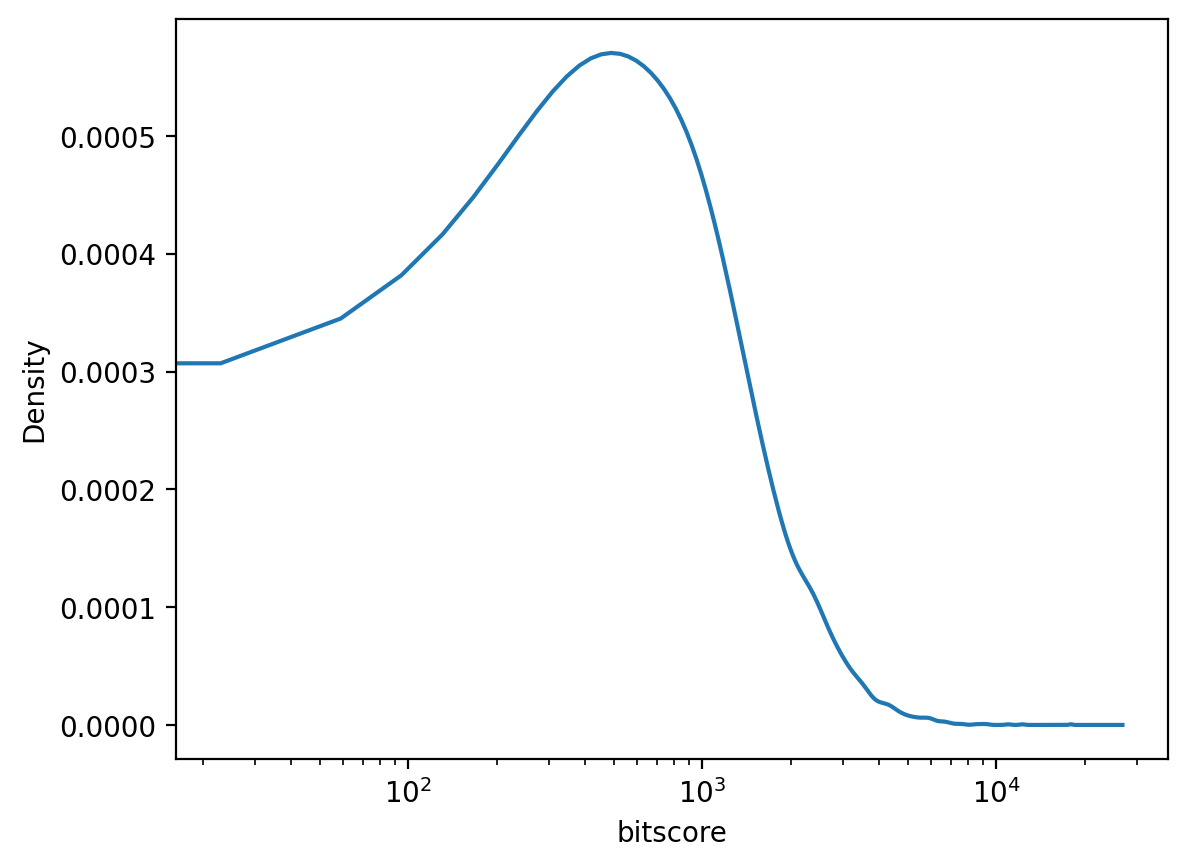

In [39]:
RBHdf[11].plot.kde()
plt.xlabel("bitscore")
plt.xscale('log')
#plt.xlim([0,1])

In [12]:
RBHdf_1000 = RBHdf[RBHdf[11]<=1000]

In [13]:
#Here, I want to see how many hits have a bitscore below 100
RBHdf[RBHdf[11]<=100].shape[0]

182

In [14]:
# Here, we want to find merge the list of uncharacterized genes with the list of reciprocal best hits
UnAnnInSm = RBHdf.merge(Unchar, left_on = 0, right_on = "Entry")

In [21]:
UnAnnInSm.shape[0]

193

In [15]:
#This is for reading the C elegans decsriptions and GO terms
CelAnns = pd.read_csv("./CelDescGO.tsv", sep="\t")

In [16]:
#Here, we want to find the annotation of unannotated genes in C. elegans
AnnotatedComplexes = UnAnnInSm.merge(CelAnns, left_on = 1, right_on ="Entry" )

In [17]:
# This is for finding the unannotated genes in S. mansoni whose peers have annotation in C. elegans
def ReportAnnotatedDifferencesCelAndSm(column):
    sel = AnnotatedComplexes[(AnnotatedComplexes[column+ "_x"].isna()) & (~(AnnotatedComplexes[column+ "_y"].isna()))]
    print(sel.shape)

In [18]:
ReportAnnotatedDifferencesCelAndSm("Gene Ontology (molecular function)")

(36, 22)


In [22]:
ReportAnnotatedDifferencesCelAndSm("Gene Ontology (biological process)")

(60, 22)


In [23]:
ReportAnnotatedDifferencesCelAndSm("Gene Ontology (cellular component)")

(60, 22)


In [27]:
AnnotatedComplexes.to_csv("./PredictionsForUncharGenes.tsv", sep="\t", index=None)